# 🪨 Rock vs Mine Classification using Logistic Regression!!

This notebook builds a binary classification model using logistic regression to identify whether a sonar signal bounced off a **rock** or a **mine**.

## 📦 Step 1: Import Required Libraries
We import necessary Python libraries for data manipulation, visualization, modeling, and evaluation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## 📥 Step 2: Load the Dataset
We load the Sonar dataset directly from an online source. It contains 60 numeric features and a label indicating 'R' for rock or 'M' for mine.

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Sonar.csv")
print("✅ Dataset loaded. Shape:", df.shape)
df.head()


✅ Dataset loaded. Shape: (208, 61)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [3]:

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Sonar.csv")

# Convert all columns to numeric if possible
df = df.apply(pd.to_numeric, errors='coerce')

# Drop columns that are completely NaN
df.dropna(axis=1, how='all', inplace=True)

# Fill remaining NaN values with column means
df.fillna(df.mean(), inplace=True)

# Final check
print("✅ Shape after cleaning:", df.shape)
print("✅ Any NaNs left:", df.isnull().sum().sum())
print("✅ Data types:\n", df.dtypes.value_counts())


✅ Shape after cleaning: (208, 61)
✅ Any NaNs left: 0
✅ Data types:
 float64    60
int64       1
Name: count, dtype: int64


## 📊 Step 2.5: Exploratory Data Analysis (EDA)
Before training any model, it's important to understand the dataset through EDA. We'll:
- Check class distribution
- Explore basic statistics
- Visualize feature distributions
- Plot correlation heatmap

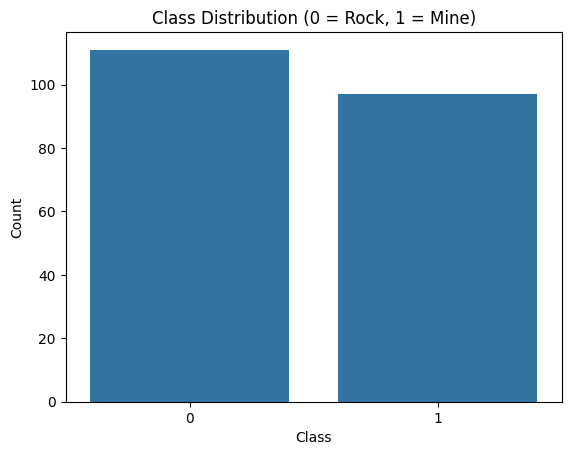

In [4]:
#Check class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Rock, 1 = Mine)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()




In [5]:
# Basic statistics of numeric features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,208.0,0.029164,0.022991,0.0015,0.013350,0.02280,0.035550,0.1371
V2,208.0,0.038437,0.032960,0.0006,0.016450,0.03080,0.047950,0.2339
V3,208.0,0.043832,0.038428,0.0015,0.018950,0.03430,0.057950,0.3059
V4,208.0,0.053892,0.046528,0.0058,0.024375,0.04405,0.064500,0.4264
V5,208.0,0.075202,0.055552,0.0067,0.038050,0.06250,0.100275,0.4010
...,...,...,...,...,...,...,...,...
V57,208.0,0.007820,0.005785,0.0003,0.003700,0.00595,0.010425,0.0355
V58,208.0,0.007949,0.006470,0.0003,0.003600,0.00580,0.010350,0.0440
V59,208.0,0.007941,0.006181,0.0001,0.003675,0.00640,0.010325,0.0364
V60,208.0,0.006507,0.005031,0.0006,0.003100,0.00530,0.008525,0.0439


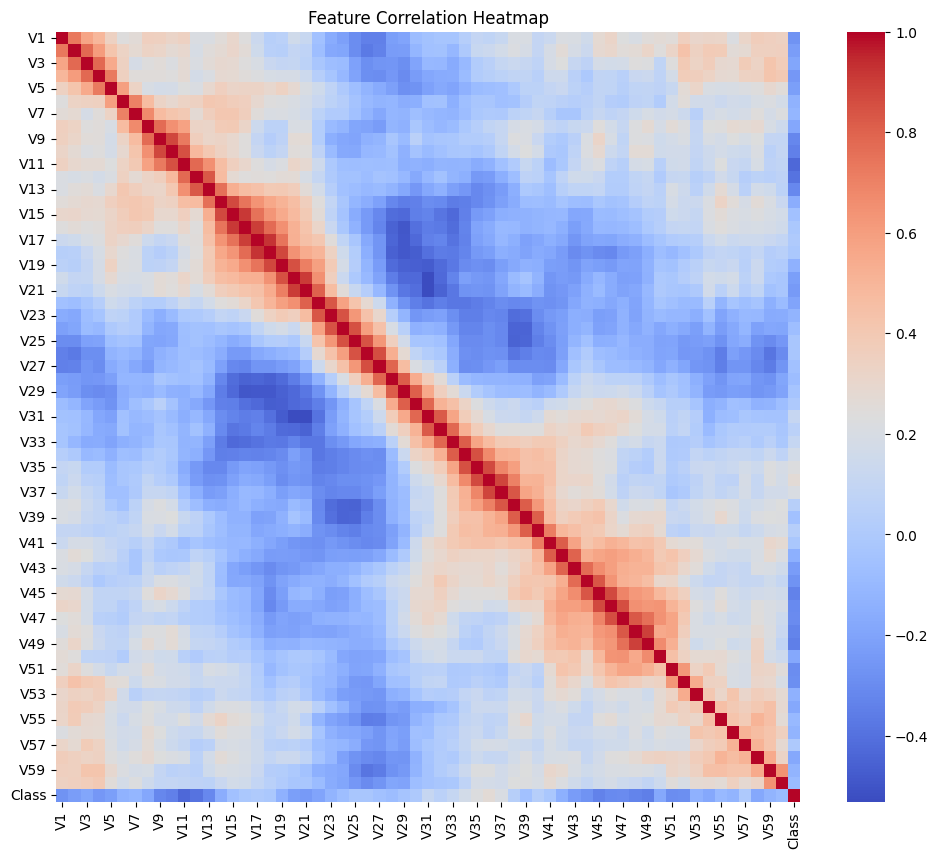

In [6]:
# Correlation heatmap (first 20 features for clarity)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


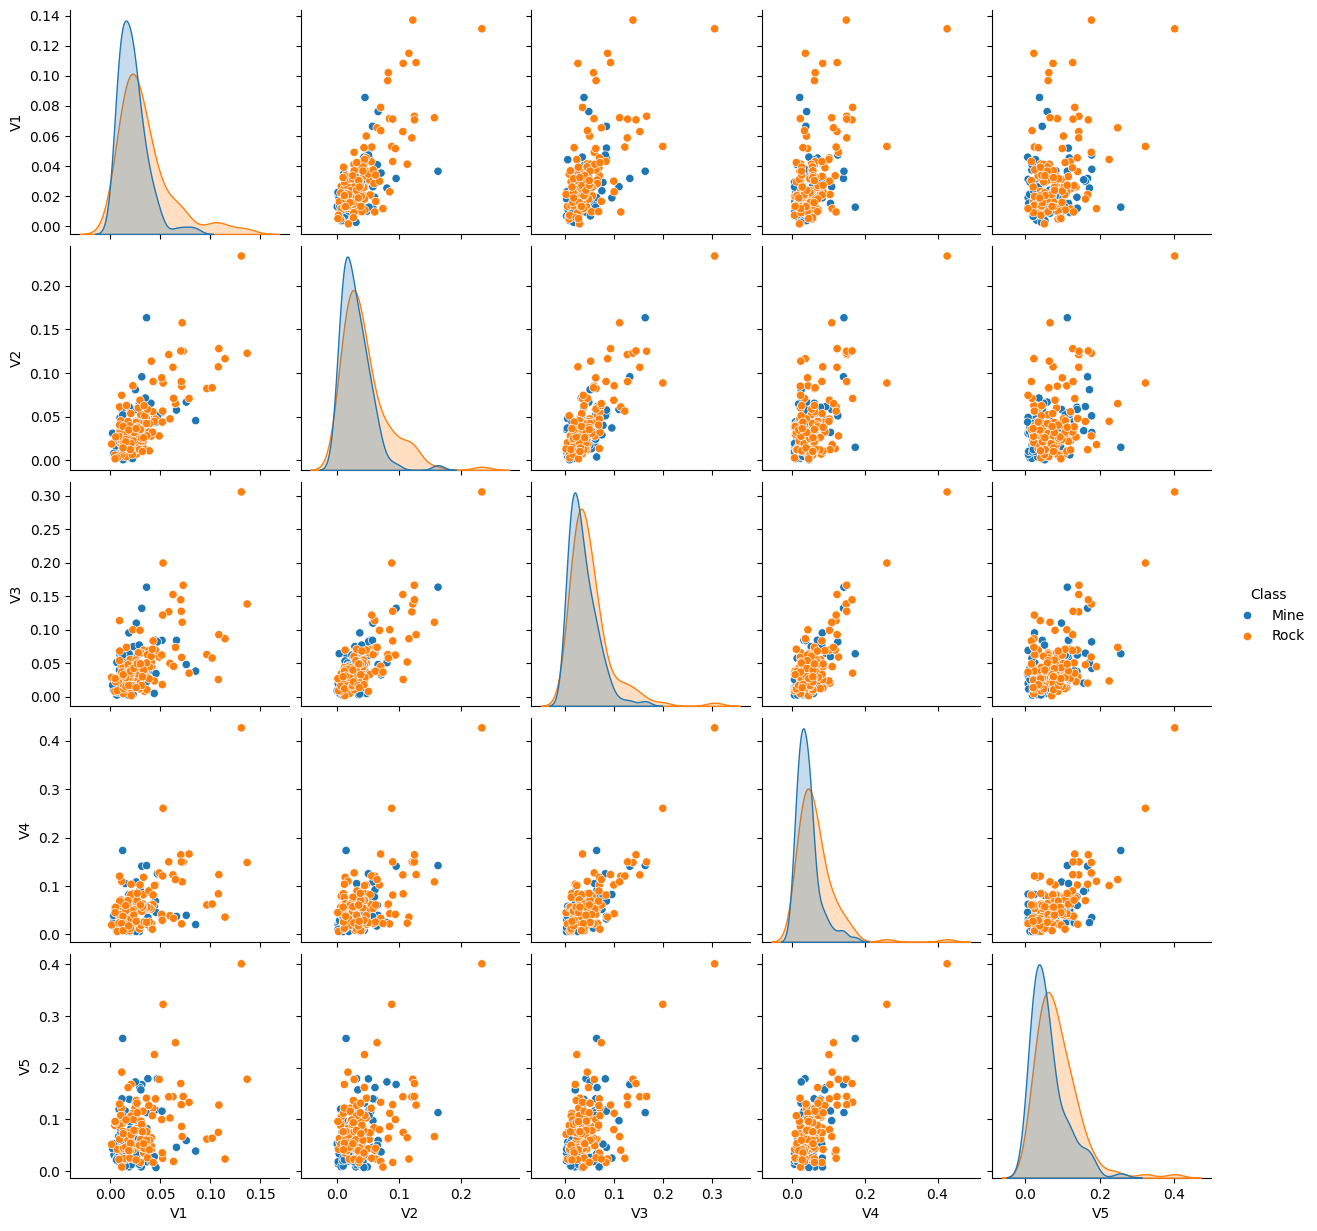

In [7]:
# Pairplot (first 5 features only)
df_temp = df.copy()
df_temp['Class'] = df_temp['Class'].map({0: 'Rock', 1: 'Mine'})
sns.pairplot(df_temp[[*df.columns[:5], 'Class']], hue='Class')
plt.show()


## 🧹 Step 3: Preprocess the Data
- We separate the features (`X`) and labels (`y`)
- Encode the label: Rock = 0, Mine = 1
- Scale the features using `StandardScaler` for better model performance

In [8]:
#Basic Info & Class Check

print(df.shape)
print(df.info())
print(df['Class'].value_counts())  # 0 = Rock, 1 = Mine


(208, 61)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      208 non-null    float64
 1   V2      208 non-null    float64
 2   V3      208 non-null    float64
 3   V4      208 non-null    float64
 4   V5      208 non-null    float64
 5   V6      208 non-null    float64
 6   V7      208 non-null    float64
 7   V8      208 non-null    float64
 8   V9      208 non-null    float64
 9   V10     208 non-null    float64
 10  V11     208 non-null    float64
 11  V12     208 non-null    float64
 12  V13     208 non-null    float64
 13  V14     208 non-null    float64
 14  V15     208 non-null    float64
 15  V16     208 non-null    float64
 16  V17     208 non-null    float64
 17  V18     208 non-null    float64
 18  V19     208 non-null    float64
 19  V20     208 non-null    float64
 20  V21     208 non-null    float64
 21  V22     208 non-null    float

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].map({'R': 0, 'M': 1})  # Encode labels

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 🔀 Step 4: Split into Training and Testing Sets
We split the data into 80% training and 20% testing to evaluate the model fairly.

In [10]:
X = df.drop(columns='Class')
y = df['Class']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

## 🤖 Step 5: Train Logistic Regression Model
We initialize and train a `LogisticRegression` model on the training data.

In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 📊 Step 6: Model Evaluation
We predict on the test set and evaluate using accuracy, confusion matrix, and classification report.

In [13]:
y_pred = model.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.8095238095238095

📉 Confusion Matrix:
[[20  6]
 [ 2 14]]

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.70      0.88      0.78        16

    accuracy                           0.81        42
   macro avg       0.80      0.82      0.81        42
weighted avg       0.83      0.81      0.81        42



## 🔍 Predict on a New Input

We can now use our trained model to predict whether a new sample is a **Rock (1)** or a **Mine (0)**.

Make sure the input is:
- A list or numpy array
- Contains exactly **60 features**
- Scaled/preprocessed similarly to the training data


In [14]:
import numpy as np

# Sample input data (must be 60 values as in the dataset)
sample_input = np.array([0.021, 0.036, 0.037, 0.043, 0.090, 0.109, 0.108, 0.098, 0.124, 0.177,
                         0.213, 0.160, 0.105, 0.133, 0.185, 0.191, 0.268, 0.379, 0.455, 0.518,
                         0.614, 0.661, 0.727, 0.675, 0.740, 0.760, 0.851, 0.776, 0.802, 0.758,
                         0.820, 0.682, 0.634, 0.651, 0.546, 0.427, 0.343, 0.280, 0.258, 0.261,
                         0.254, 0.244, 0.243, 0.211, 0.179, 0.113, 0.074, 0.036, 0.028, 0.021,
                         0.013, 0.010, 0.011, 0.006, 0.006, 0.007, 0.007, 0.006, 0.006, 0.004])

# Reshape because we're predicting a single sample
sample_input = sample_input.reshape(1, -1)

# Predict
predicted_class = model.predict(sample_input)[0]
class_name = "Rock" if predicted_class == 1 else "Mine"

print(f"🎯 Prediction: {class_name} ({predicted_class})")


🎯 Prediction: Mine (0)


In [15]:
# Predict class probabilities
predicted_proba = model.predict_proba(sample_input)

print(f"🔍 Probability of Mine (0): {predicted_proba[0][0]:.4f}")
print(f"🔍 Probability of Rock (1): {predicted_proba[0][1]:.4f}")
print(f"🎯 Final Prediction: {'Rock' if predicted_class == 1 else 'Mine'}")


🔍 Probability of Mine (0): 0.8204
🔍 Probability of Rock (1): 0.1796
🎯 Final Prediction: Mine


## 🧯 Step 7: Confusion Matrix Visualization
We plot a heatmap of the confusion matrix using seaborn.

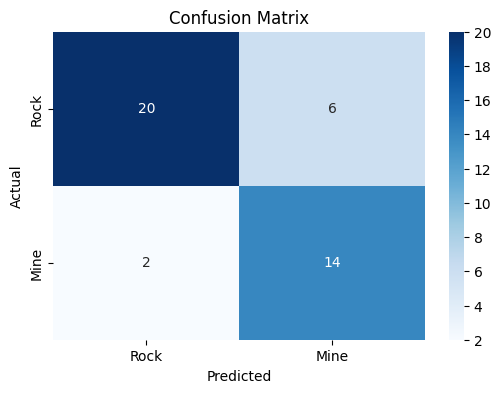

In [16]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Rock', 'Mine'], yticklabels=['Rock', 'Mine'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 🧠 Step 8: Visualizing Data Using PCA
We reduce dimensionality to 2 components using PCA and visualize how well the data separates between classes.

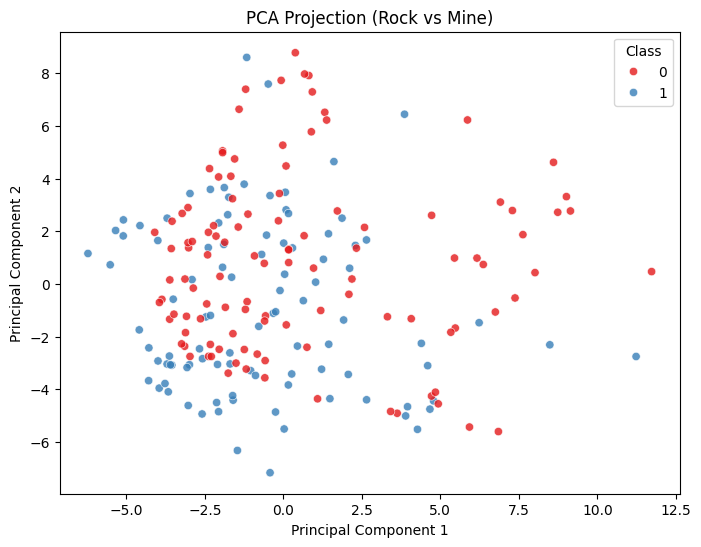

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.8)
plt.title("PCA Projection (Rock vs Mine)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()